# Train and save model

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from main import VideoAnalyzer
import pandas as pd

2022-11-21 02:26:01.728544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-21 02:26:01.728565: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
v = VideoAnalyzer()

In [3]:
df = pd.read_csv('clips_events_example.csv',low_memory=False)
df['event'] = df['event'].astype('string')
df['path'] = df['path'].astype('string')
df

,event,path
0,['pass'],test_10.mp4
1,['cross'],test_43.mp4
2,"['cross', 'pass']",test_73.mp4


In [4]:
df['event'] = np.where(
    df['event'].str.contains('pass', regex=False),
    1,
    0
)

In [5]:
def get_trace(video_path):
    return v.prepare(v.run(video_path)).values.tolist()

df['trace'] = df['path'].apply(get_trace, convert_dtype=True)
df

,event,path,trace
0,1,test_10.mp4,"[[-0.35021954545049266, 1.805063969091899, -1...."
1,0,test_43.mp4,"[[-0.35021954545049266, 1.8387443579921885, -2..."
2,1,test_73.mp4,"[[-0.35021954545049266, 0.6511963648675435, 0...."


In [6]:
model = Sequential()

2022-11-21 02:27:03.454928: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/walt/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-21 02:27:03.455021: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-21 02:27:03.455098: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wmsi): /proc/driver/nvidia/version does not exist
2022-11-21 02:27:03.456301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.add(LSTM((1), batch_input_shape=(None, 101, 5), return_sequences=False))

In [8]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_train = list(df.trace)
y_train = list(df.event)
x_test = list(df.trace)
y_test = list(df.event)

In [11]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/400
1/1 [==============================] - 0s 58ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/400
1/1 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/400
1/1 [==============================] - 0s 58ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/400
1/1 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/400
1/1 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/400
1/1 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/400
1/1 [==============================] - 0s 54ms/step 

Epoch 62/400
1/1 [==============================] - 0s 57ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 63/400
1/1 [==============================] - 0s 54ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 64/400
1/1 [==============================] - 0s 53ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 65/400
1/1 [==============================] - 0s 48ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 66/400
1/1 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 67/400
1/1 [==============================] - 0s 57ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 68/400
1/1 [==============================] - 0s 58ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 69/400
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 51ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 123/400
1/1 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 124/400
1/1 [==============================] - 0s 51ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 125/400
1/1 [==============================] - 0s 50ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 126/400
1/1 [==============================] - 0s 50ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 127/400
1/1 [==============================] - 0s 50ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 128/400
1/1 [==============================] - 0s 48ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 129/400
1/1 [==============================] - 0s 43ms/s

1/1 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 183/400
1/1 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 184/400
1/1 [==============================] - 0s 45ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 185/400
1/1 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 186/400
1/1 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 187/400
1/1 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 188/400
1/1 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 189/400
1/1 [==============================] - 0s 47ms/s

1/1 [==============================] - 0s 44ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 243/400
1/1 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 244/400
1/1 [==============================] - 0s 47ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 245/400
1/1 [==============================] - 0s 44ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 246/400
1/1 [==============================] - 0s 47ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 247/400
1/1 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 248/400
1/1 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 249/400
1/1 [==============================] - 0s 55ms/s

1/1 [==============================] - 0s 55ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 303/400
1/1 [==============================] - 0s 53ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 304/400
1/1 [==============================] - 0s 63ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 305/400
1/1 [==============================] - 0s 47ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 306/400
1/1 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 307/400
1/1 [==============================] - 0s 64ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 308/400
1/1 [==============================] - 0s 61ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 309/400
1/1 [==============================] - 0s 62ms/s

1/1 [==============================] - 0s 45ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 363/400
1/1 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 364/400
1/1 [==============================] - 0s 46ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 365/400
1/1 [==============================] - 0s 54ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 366/400
1/1 [==============================] - 0s 64ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 367/400
1/1 [==============================] - 0s 58ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 368/400
1/1 [==============================] - 0s 51ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 369/400
1/1 [==============================] - 0s 48ms/s

In [13]:
results = model.predict(x_test)
results

1/1 [==============================] - 0s 23ms/step


array([[nan],
       [nan],
       [nan]], dtype=float32)

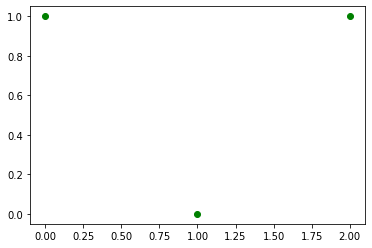

In [14]:
plt.scatter(range(3), results, c='r')
plt.scatter(range(3), y_test, c='g')
plt.show()

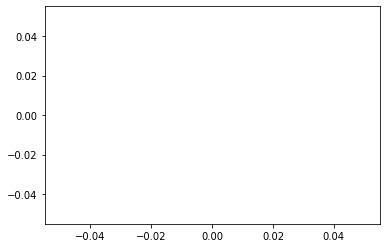

In [15]:
plt.plot(history.history['loss'])
plt.show()

In [17]:
model.save('VideoPredictionModel')

INFO:tensorflow:Assets written to: VideoPredictionModel/assets


INFO:tensorflow:Assets written to: VideoPredictionModel/assets
